# Arrayed SD

Arrayed SD allows for arrays to be used in SD models. 

First let's look at how arrayed SD works. We start with some boilerplate to get a BPTK project up and running:

In [27]:
from BPTK_Py import Model
import BPTK_Py

model = Model(starttime=0.0, stoptime=20.0, dt=1.0, name="Test Model")

Next we can start creating arrayed components. There are two options for arrayed elements: Vectors (one dimensional arrays) and Matrices (two dimensional arrays). These can be declared as follows:

In [28]:
vector = model.converter("converter_vector")

# create a vector of length 2 with values 2.0, 3.0
vector.setup_vector(2, [2.0, 3.0])

matrix = model.converter("converter_matrix")

# create a matrix of size 2x3 with values [2.0, 3.0, 4.0], [5.0, 6.0, 7.0]
matrix.setup_matrix([2, 3], [[2.0, 3.0, 4.0], [5.0, 6.0, 7.0]])

A variety of operations can be performed on vectors and matrices. Below are some examples, for a more detailed list see the documentation.

In [29]:
# multiply the vector with the matrix
multiplied = model.converter("multiplied")
multiplied.equation = vector.dot(matrix)

# get the second biggest element of the vector
rank = model.converter("rank")
rank.equation = matrix.arr_rank(2)

# Let's get the output of the rank converter
data = rank.plot(return_df=True)
data[rank.name][1]

6.0

## Named Arrays
Besides vectors and matrices named arrays are possible. These arrays can make code more readable but do not allow for some functions to be used which require indexed matrices (e.g. the dot operator). Below is an example.

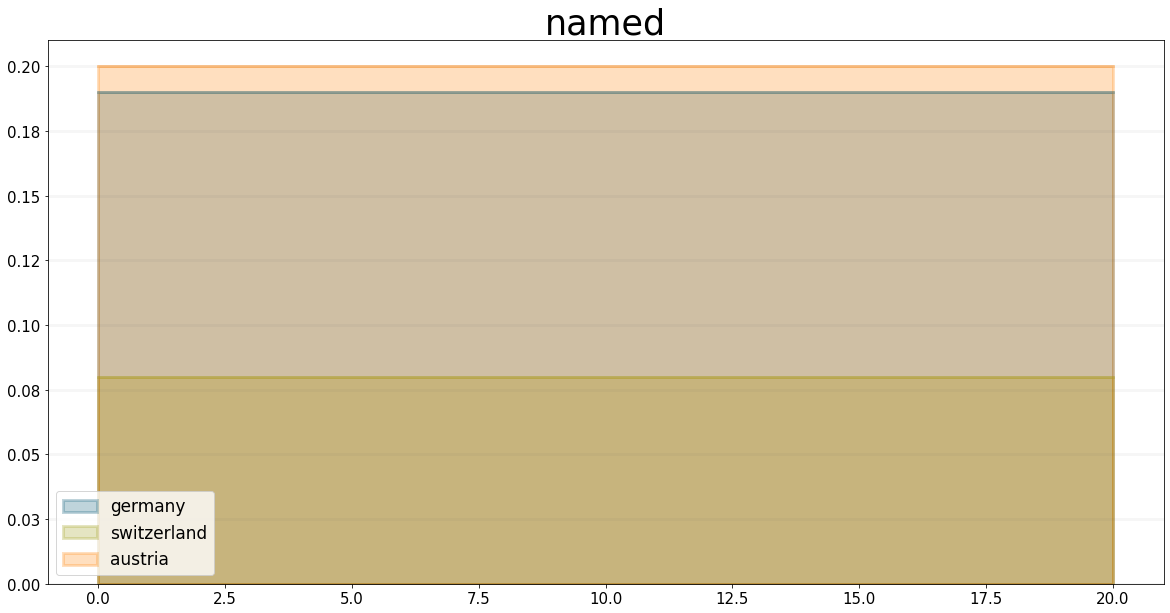

In [30]:
named = model.converter("named")
named.setup_named_vector({"germany": 0.19, "switzerland": 0.08, "austria": 0.20})

named.plot()

We can then do operations on named vectors.

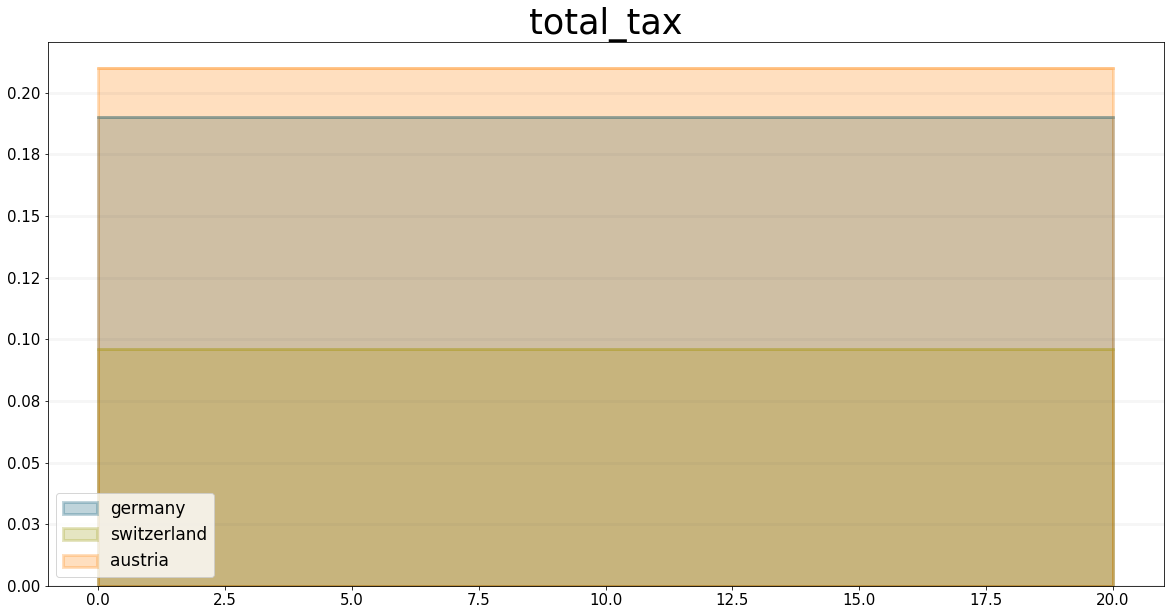

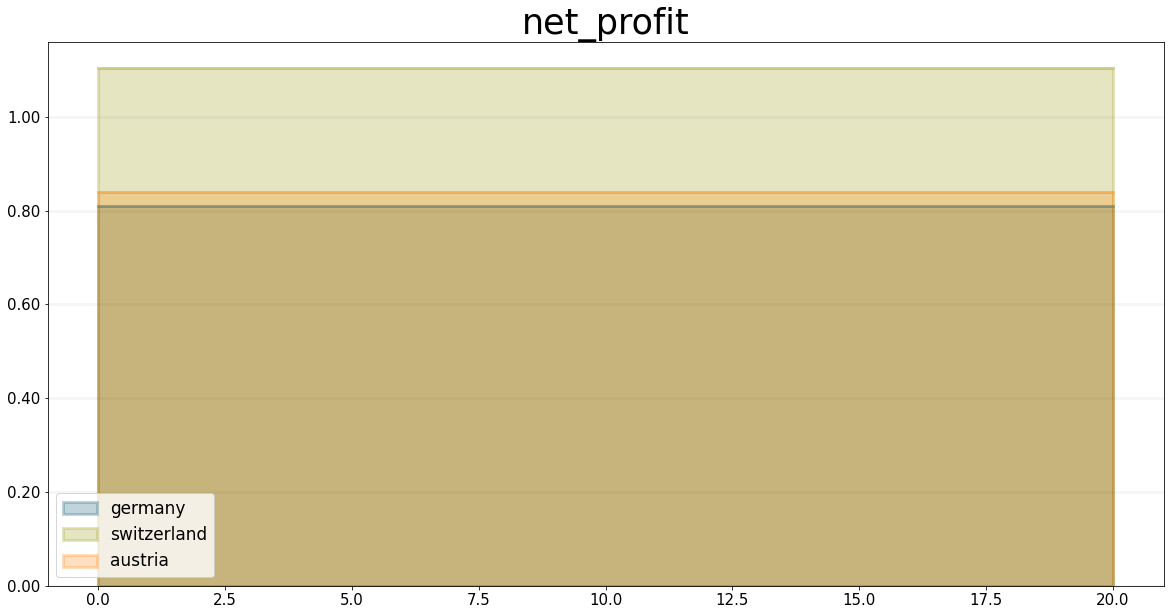

In [31]:
named_price = model.converter("named_price")
named_price.setup_named_vector({"germany": 1.0, "switzerland": 1.2, "austria": 1.05})

total_tax = model.converter("total_tax")
total_tax.equation = named * named_price

total_tax.plot()


net_profit = model.converter("net_profit")
net_profit.equation = named_price - total_tax

net_profit.plot()

Careful: The location in the vector is used to determine the position in the vector, not vector names!

## Plotting
Plotting vectors and matrices is straightforward. Let's plot the vector below:

In [32]:
scenario_manager = {"sm": {"model": model}}

bptk = BPTK_Py.bptk()
bptk.register_scenario_manager(scenario_manager)
bptk.register_scenarios(
    scenario_manager="sm",
    scenarios=
    {
        "testScenario":{}
    }
)

In [33]:
from BPTK_Py.visualizations import SimpleDashboard
import ipywidgets as widgets

dashboard = SimpleDashboard(bptk, scenario_manager="sm", scenario="testScenario")

plot = dashboard.add_plot(
    equations=["converter_vector[0]", "converter_vector[1]"], 
    names=["VectorX", "VectorY"],
    title="Vector",
    x_label="X",
    y_label="Y",
)

display(plot)
dashboard.start()

Output()

Similarly matrices can be plotted.

In [34]:
from BPTK_Py.visualizations import SimpleDashboard
import ipywidgets as widgets

dashboard = SimpleDashboard(bptk, scenario_manager="sm", scenario="testScenario")

plot = dashboard.add_plot(
    equations=["converter_matrix[0][0]", "converter_matrix[0][1]", "converter_matrix[0][2]", "converter_matrix[1][0]", "converter_matrix[1][1]", "converter_matrix[1][2]"],
    names=["Matrix00", "Matrix01", "Matrix02", "Matrix10", "Matrix11", "Matrix12"],
    title="Matrix",
    x_label="X",
    y_label="Y",
)

display(plot)
dashboard.start()

Output()

The same works for named arrays:

In [35]:
from BPTK_Py.visualizations import SimpleDashboard
import ipywidgets as widgets

dashboard = SimpleDashboard(bptk, scenario_manager="sm", scenario="testScenario")

plot = dashboard.add_plot(
    equations=["net_profit[germany]", "net_profit[switzerland]", "net_profit[austria]"],
    names=["Germany", "Switzerland", "Austria"],
    title="Net Profit",
    x_label="X",
    y_label="Y",
)

display(plot)
dashboard.start()

Output()

## Function documentation

Below is documentation of all relevant arrayed SD functions. First, let's declare some basic elements to do operations on:

In [36]:
constant = model.converter("converter_constant")
constant.equation = 100.0

vector3 = model.converter("converter_vector3")
vector3.setup_vector(3, [2.0, 3.0, 4.0])

matrix33 = model.converter("converter_matrix3")
matrix33.setup_matrix([3, 3], [[2.0, 3.0, 4.0], [5.0, 6.0, 7.0], [8.0, 9.0, 10.0]])

matrix32 = model.converter("converter_matrix32")
matrix32.setup_matrix([3, 2], [[2.0, 3.0], [5.0, 6.0], [8.0, 9.0]])

### Array Sum
Calculates the element-wise sum of an array.

Parameter:
    - include_all: Boolean -> If true, includes both numbered and named elements.

Example (2.0 + 3.0 + 4.0 = 9.0):

In [37]:
arr_sum_converter = model.converter("arr_sum_converter")
arr_sum_converter.equation = vector3.arr_sum()

data = arr_sum_converter.plot(return_df=True)
assert(data[arr_sum_converter.name][0] == 9.0)
data[arr_sum_converter.name][0]

9.0

### Array Product
Calculates the element-wise product of an array.

Parameter:
    - include_all: Boolean -> If true, includes both numbered and named elements.

Example (2.0 * 3.0 * 4.0 = 24.0):

In [38]:
arr_prod_converter = model.converter("arr_prod_converter")
arr_prod_converter.equation = vector3.arr_prod()

data = arr_prod_converter.plot(return_df=True)
assert(data[arr_prod_converter.name][0] == 24.0)
data[arr_prod_converter.name][0]

24.0

### Array rank
Calculates the nth highest element of an array.

Parameter: 
    - rank: int -> The rankth highest element will be returned.

Example: (third highest of matrix33 = 8.0):

In [39]:
arr_rank_converter = model.converter("arr_rank_converter")
arr_rank_converter.equation = matrix33.arr_rank(3)

data = arr_rank_converter.plot(return_df=True)
assert(data[arr_rank_converter.name][0] == 8.0)
data[arr_rank_converter.name][0]

8.0

### Array Mean
Calculates the element-wise mean of an array.

Example (mean of matrix32 = 5.5):

In [40]:
arr_mean_converter = model.converter("arr_mean_converter")
arr_mean_converter.equation = matrix32.arr_mean()

data = arr_mean_converter.plot(return_df=True)
assert(data[arr_mean_converter.name][0] == 5.5)
data[arr_mean_converter.name][0]

5.5

### Array Median
Calculates the element-wise median of an array.

Example (meadian of matrix32 = 5.5):

In [41]:
arr_median_converter = model.converter("arr_median_converter")
arr_median_converter.equation = matrix32.arr_median()

data = arr_median_converter.plot(return_df=True)
assert(data[arr_median_converter.name][0] == 5.5)
data[arr_median_converter.name][0]

5.5

### Array Standard Deviation
Calculates the element-wise standard deviation of an array.

Example (standard deviation of matrix32 = 2.5):

In [42]:
arr_stddev_converter = model.converter("arr_stddev_converter")
arr_stddev_converter.equation = matrix32.arr_stddev()

data = arr_stddev_converter.plot(return_df=True)
assert(data[arr_stddev_converter.name][0] == 2.5)
data[arr_stddev_converter.name][0]

2.5

### Array Size
Calculates the size of an array. The size of the highest level will be returned (for example 3 for a 3 by 2 matrix).

Example (size of matrix32 = 3)

In [43]:
arr_size_converter = model.converter("arr_size_converter")
arr_size_converter.equation = matrix32.arr_size()

data = arr_size_converter.plot(return_df=True)
assert(data[arr_size_converter.name][0] == 3)
data[arr_size_converter.name][0]

3

### Array Dot
The Dot function uses matrix/vector multiplication logic. It is possible to input illegal arguments. Legal inputs are:
- Any vector * constant => vector
- Any matrix * constant => matrix
- Vector of size m * Vector of size m => constant
- Vector of size m * Matrix of size mxn => vector of size m
- Matrix of size mxn * Vector of size n => vector of size n
- Matrix of size mxn * Matrix of size nxp => matrix of size mxp

Below are examples for the described dot operations:

#### Vector x Constant:

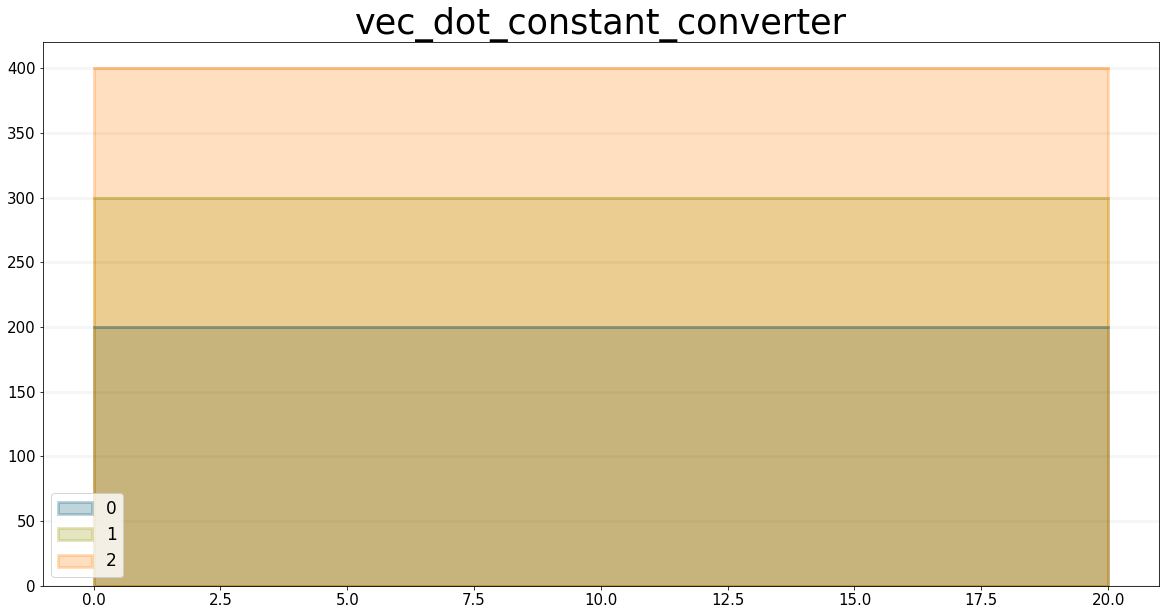

In [45]:

vec_dot_constant_converter = model.converter("vec_dot_constant_converter")
vec_dot_constant_converter.equation = vector3.dot(constant)

vec_dot_constant_converter.plot()

#### Vector x Vector

In [ ]:
vec_dot_vec_converter = model.converter("vec_dot_vec_converter")
vec_dot_vec_converter.equation = vector3.dot(vector3)

vec_dot_vec_converter.plot()

29.0

#### Vector x Matrix

In [ ]:
vec_dot_mat_converter = model.converter("vec_dot_mat_converter")
vec_dot_mat_converter.equation = vector3.dot(matrix33)

vec_dot_mat_converter.plot()

0
1
2


['vec_dot_mat_converter[0]: 51.0',
 'vec_dot_mat_converter[1]: 60.0',
 'vec_dot_mat_converter[2]: 69.0']

#### Matrix x Vector

In [ ]:
mat_dot_vec_converter = model.converter("mat_dot_vec_converter")
mat_dot_vec_converter.equation = matrix33.dot(vector3)

mat_dot_vec_converter.plot()

0
1
2


['mat_dot_vec_converter[0]: 29.0',
 'mat_dot_vec_converter[1]: 56.0',
 'mat_dot_vec_converter[2]: 83.0']

#### Matrix x Matrix

### Math operations
Mathematical operations are executed on a per-element basis. That means that for all basic mathematical operations both arrays have to have equal size, the exception being array constant operations. Below are examples for all basic mathematical operations.\

#### Multiplication
Element-wise multiplication works with arrays of the same size or arrays and constants.

Example: ([2.0, 3.0, 4.0] * [2.0, 3.0, 4.0] = [4.0, 9.0, 16.0]):

In [ ]:
vec_mul_vec_converter = model.converter("vec_mul_vec_converter")
vec_mul_vec_converter.equation = vector3 * vector3

vec_mul_vec_converter.plot()

0
1
2


['vec_mul_vec_converter[0]: 4.0',
 'vec_mul_vec_converter[1]: 9.0',
 'vec_mul_vec_converter[2]: 16.0']

#### Addition
Element-wise multiplication works with arrays of the same size or arrays and constants.

Example: ([2.0, 3.0, 4.0] + [2.0, 3.0, 4.0] = [4.0, 6.0, 8.0]):

In [ ]:
vec_add_vec_converter = model.converter("vec_add_vec_converter")
vec_add_vec_converter.equation = vector3 + vector3

vec_add_vec_converter.plot()

0
1
2


['vec_add_vec_converter[0]: 4.0',
 'vec_add_vec_converter[1]: 6.0',
 'vec_add_vec_converter[2]: 8.0']

#### Division
Element-wise division works with arrays of the same size or arrays and constants.

Example: ([2.0, 3.0, 4.0] / [4.0, 3.0, 2.0] = [4.0, 6.0, 8.0]):

In [ ]:
vec_div_vec_converter = model.converter("vec_div_vec_converter")
vector3_alternative = model.converter("converter_vector3_alternative")
vector3_alternative.setup_vector(3, [4.0, 3.0, 2.0])
vec_div_vec_converter.equation = vector3 / vector3_alternative

vec_div_vec_converter.plot()

0
1
2


['vec_div_vec_converter[0]: 0.5',
 'vec_div_vec_converter[1]: 1.0',
 'vec_div_vec_converter[2]: 2.0']